# Ant Colony Optimization

Ant Colony Optimization (ACO) is a Swarm Intelligence (SI) algorithm that has been introduced as an approach to solve combinatorial optimization problems, such as routing problems.

You may already be familiar with the Traveling Salesman Problem (TSP), the goal of which is to find the shortest path traversing all nodes on a given graph. A generalization of the TSP is the Vehicle Routing Problem (VRP - or Truck Dispatching Problem as first introduced [1]), where the goal is to find the optimal set of routes for a fleet of vehicles to traverse to deliver to a given set of customers.

ACO is inspired by the ants' foraging behaviour. Each ant (leaving the nest) performs a search towards a random direction until it finds a food source. Then, it returns to the nest. The path leading to the food source is "marked" because the ant leaves behind a trace of pheromone while exploring. The pheromone can be detected by other ants. Thus, it is more possible for other ants starting their search to follow this "marked" path since the pheromone indicates a food source exists in that direction. Every new ant following this path applies an additional layer of pheromone on it. As a result, the more ants traversing the path the more pheromone is applied to it. On the other hand, if no food source has been found, the pheromone scent is decreased because the pheromone is gradually evaporated.

On the algorithmic equivalent, every agent (or candidate solution) is an ant performing a search in the solution space. The "paths" created by the agent denote a sequence of nodes. Below, you can see the application of the ACO concept on the simplest routing problem, i.e., the Traveling Salesman Problem (TSP).

[1] Dantzig, G. B., & Ramser, J. H. (1959). The truck dispatching problem. *Management science*, 6(1), 80-91. https://doi.org/10.1287/mnsc.6.1.80

### Traveling Salesman Problem (TSP)

This is a combinatorial problem depicted by a graph (a network), where the graph's nodes represent (a) depots and (b) customers.


So, let's create a random graph:

In [2]:
import numpy as np
import random

# create n random nodes on a 20x20 grid
nodes_number = 10
nodes = []
x = []
y = []
for _ in range(nodes_number):
  x.append(random.uniform(-10, 10))
  y.append(random.uniform(-10, 10))

# convert lists to arrays to enable their manipulation with numpy
x = np.array(x)
y = np.array(y)

# then, we can construct the "matrix" nodes containing each node's coordinates
nodes = np.vstack((x,y))
nodes = nodes.T
print(nodes)

[[ 0.84040919 -4.08909339]
 [-1.80569557 -7.59571831]
 [ 8.12464955 -6.52257638]
 [ 0.42298807  6.3161425 ]
 [-9.32364369 -1.80827269]
 [ 4.50617849 -8.13129489]
 [ 4.62276933 -7.74643887]
 [-7.10714204  7.3220665 ]
 [-8.36690896 -8.50958641]
 [-4.56874458 -5.11517533]]


and by using `matplotlib` we will demonstrate the graph:

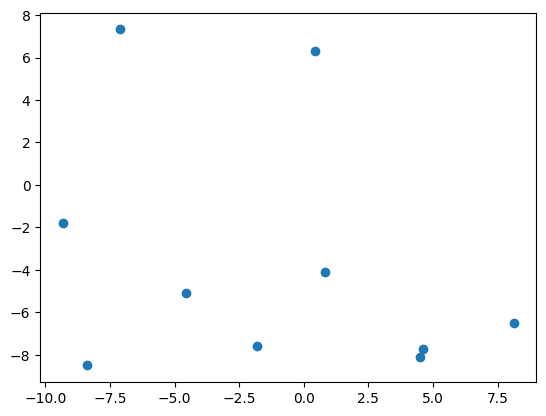

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
#plt.plot(x,y)
plt.show()

The first thing we need is the distance matrix $[d_{ij}]$, including the distance between every $i$ and $j$ node.

In [4]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

distanceMatrix = pdist(nodes)
print(squareform(distanceMatrix))

[[ 0.          4.39298176  7.67997377 10.41360525 10.41681881  5.45685417
   5.26140895 13.90604692 10.21349431  5.50561429]
 [ 4.39298176  0.          9.98816238 14.08924774  9.48757455  6.33455574
   6.43023154 15.83179202  6.62455101  3.7131568 ]
 [ 7.67997377  9.98816238  0.         14.97158282 18.073948    3.95996314
   3.70958279 20.58352769 16.61083113 12.77117976]
 [10.41360525 14.08924774 14.97158282  0.         12.6886939  15.01335708
  14.67631961  7.59702196 17.23555997 12.47366915]
 [10.41681881  9.48757455 18.073948   12.6886939   0.         15.20672848
  15.15797657  9.39552944  6.76926487  5.79177611]
 [ 5.45685417  6.33455574  3.95996314 15.01335708 15.20672848  0.
   0.40212881 19.33069042 12.87864453  9.56301239]
 [ 5.26140895  6.43023154  3.70958279 14.67631961 15.15797657  0.40212881
   0.         19.09582874 13.01207656  9.5607257 ]
 [13.90604692 15.83179202 20.58352769  7.59702196  9.39552944 19.33069042
  19.09582874  0.         15.88169534 12.69363801]
 [10.213

To make it more presentable, we can print it as a dataframe using `pandas`

In [5]:
import pandas as pd
from scipy.spatial import distance_matrix

df = pd.DataFrame(nodes, columns=[nodes[0]])
Distance_Matrix = pd.DataFrame(distance_matrix(df.values, df.values))
Distance_Matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,4.392982,7.679974,10.413605,10.416819,5.456854,5.261409,13.906047,10.213494,5.505614
1,4.392982,0.000000,9.988162,14.089248,9.487575,6.334556,6.430232,15.831792,6.624551,3.713157
2,7.679974,9.988162,0.000000,14.971583,18.073948,3.959963,3.709583,20.583528,16.610831,12.771180
3,10.413605,14.089248,14.971583,0.000000,12.688694,15.013357,14.676320,7.597022,17.235560,12.473669
4,10.416819,9.487575,18.073948,12.688694,0.000000,15.206728,15.157977,9.395529,6.769265,5.791776
5,5.456854,6.334556,3.959963,15.013357,15.206728,0.000000,0.402129,19.330690,12.878645,9.563012
6,5.261409,6.430232,3.709583,14.676320,15.157977,0.402129,0.000000,19.095829,13.012077,9.560726
7,13.906047,15.831792,20.583528,7.597022,9.395529,19.330690,19.095829,0.000000,15.881695,12.693638
8,10.213494,6.624551,16.610831,17.235560,6.769265,12.878645,13.012077,15.881695,0.000000,5.093926
9,5.505614,3.713157,12.771180,12.473669,5.791776,9.563012,9.560726,12.693638,5.093926,0.000000


We can observe that:

$d_{ij} = d_{ji}$

Meaning that the travelling *cost* from $i$ to $j$ is equal to the travelling *cost* from $j$ to $i$. This is not trivial. On an artificial scenario, we may assume this applies to simplify the problem. But in reality, the distances are not equal. <font color='red'>(Why?)</font> When this assumption applies, we consider the problem to be a ***Symmetric TSP***.

**Important:** note that we refer to travelling *cost* and not *distance*, because it is not always the case that we measure the travelling cost from $i$ to $j$ node in distance units. It may be fuel cost or time, for example.

Also, the diagonal of the matrix above is as follows:

$d_{ii} = 0$

because it represents the distance of each $i$ node to itself.

The Traveling Salesman Problem can be described by a graph $𝐺(𝑉, 𝐴)$, where $𝑉 = {0, 𝑁}$ represents the set of nodes and $𝐴 = {(𝑖,𝑗)|𝑖,𝑗 ∈ 𝑉, 𝑖 ≠ 𝑗}$ represents the set of arcs.

Usually, in the set $𝑉$, the starting node (depot) is denoted by 0 and the subset $𝑁$ is defined as $𝑁 = {1,2,3, … , 𝑛}$, where $𝑛$ is the total number of the graph's nodes (except the starting one).

The goal of this problem is finding the shortest (closed) path traversing all the graph's nodes. In other words, the goal is to find the shortest path to be traversed by the salesman, so that they visit all cities (nodes) and returns to the starting node.

The problem's (mathematical) formulation is given below:

\begin{align}
\text{min} \quad & \sum_{i = 1}^{n} \sum_{j = 1, j \neq i}^{n} c_{ij} x_{ij}, \\
\text{subject to} \\
& \sum_{i=1, i \neq j}^{n} x_{ij} = 1, \quad j=1,2,…,n,\\
& \sum_{j=1, j \neq i}^{n} x_{ij} = 1, \quad i=1,2,…,n,\\
\end{align}

The decision variables $𝑥_{𝑖𝑗}$ are binary variables, where:
\begin{equation}
  x_{ij} =
    \begin{cases}
      1 & \text{if the arc <$𝑖,𝑗$> is part of the solution}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

The objective function minimizes the total travelling cost. In our case study, $[c_{ij}]=[d_{ij}]$ since we consider the travelling cost from $i$ to $j$ to be equal to the distance of the arc <$𝑖,𝑗$>.

An important step (for every Evolutionary Computation-oriented approach) is to define the **solution representation**.

Let us consider a graph with 5 nodes and a random solution (tour):

In [6]:
random_tour = np.random.permutation(5)
random_tour

array([0, 1, 4, 2, 3], dtype=int32)

The (binary) matrix $[x_{ij}]$ should contain ones (1) in the matrix elements that correspond to "*going from node $i$ to node $j$*", i.e., the corresponding $(i,j)$ matrix element.

In [7]:
x_ij = np.zeros((5,5))
x_ij

print('The tour is:')
[print(' %d' %random_tour[i],'->', end = '') for i in range(len(random_tour))]
print(' %d' %random_tour[0])

for i in range(len(random_tour)):
    if i == len(random_tour)-1:
        # the last array element does not correspond to the last tour's node, since the salesman has to return to the starting node
        x_ij[random_tour[i]][random_tour[0]] = 1
    else:
        x_ij[random_tour[i]][random_tour[i+1]] = 1
print('\nand the decision variables [x_ij]:')
x_ij

The tour is:
 0 -> 1 -> 4 -> 2 -> 3 -> 0

and the decision variables [x_ij]:


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

Thus, if we create a random distance matrix:

In [8]:
Dij = np.random.rand(5,5)
# ..where we ensure all elements on the diagonal are equal to zero
np.fill_diagonal(Dij, 0)
Dij

array([[0.        , 0.47630528, 0.14805044, 0.50948124, 0.33716849],
       [0.95738871, 0.        , 0.1381721 , 0.10774422, 0.78636195],
       [0.40632815, 0.89379609, 0.        , 0.7447877 , 0.52551868],
       [0.37553978, 0.44356067, 0.62486775, 0.        , 0.08357485],
       [0.45450628, 0.07277973, 0.70621418, 0.8292358 , 0.        ]])

the above (random) solution has a quality (fitness function cost, or objective function cost):

In [9]:
print('first, multiplying the matrices [x_ij] and [d_ij], we get:\n')
multiplication_of_matrices = x_ij * Dij
print(multiplication_of_matrices)

print('\nand then, the summation of the rows and columns is the objective function cost:')
cost1 = sum(sum(multiplication_of_matrices))
cost1

first, multiplying the matrices [x_ij] and [d_ij], we get:

[[0.         0.47630528 0.         0.         0.        ]
 [0.         0.         0.         0.         0.78636195]
 [0.         0.         0.         0.7447877  0.        ]
 [0.37553978 0.         0.         0.         0.        ]
 [0.         0.         0.70621418 0.         0.        ]]

and then, the summation of the rows and columns is the objective function cost:


np.float64(3.0892088784941896)

Let us go through the problem's constraints.

The first one:

$\sum_{i=1, i \neq j}^{n} x_{ij} = 1, \quad j=1,2,…,n,$

ensures that from each $i$ node only one arc towards any $j$ node is traversed. Therefore, for each $i$ row of the $[x_{ij}]$ matrix, only one element should be equal to the unity (1) or in other words, the summation of the row should be equal to 1:

In [10]:
x_ij.sum(axis=0)

array([1., 1., 1., 1., 1.])

Along the same lines, the second constraint:

$\sum_{j=1, j \neq i}^{n} x_{ij} = 1, \quad i=1,2,…,n,$

ensures that only one arc is visiting node $j$. Therefore, for each $j$ column of the $[x_{ij}]$ matrix, only one element should be equal to the unity (1) or in other words, the summation of the column should be equal to 1:

In [11]:
x_ij.sum(axis=1)

array([1., 1., 1., 1., 1.])

Finally, the problem's objective function is defined as follows:

In [12]:
def tsp_obj(x_ij, d_ij):
    return sum(sum(x_ij * d_ij))

### Pseudocode

Below, you can find the pseudocode of Ant Colony Optimization (ACO):
```python
Step 1:  Parameter initialization
Step 2:  Calculating the heuristic information matrix [h_{ij}]
Step 3:  Pheromone matrix [tau_{ij}] initialization
Step 4:  Population initialization
Step 5:  while stopping criterion not met
Step 6:        for each candidate solution (ant) in population
Step 7:            while not all customer nodes are part of the solution
Step 8:                  Select next node
Step 9:                  Calculate solution's quality using the objective function
Step 10:                 Pheromone update
Step 11:           End
Step 12:       End
Step 13: End
Step 14: return best solution (optimal routes)
```

As in any other Evolutionary Computation approach, any stopping criterion can be used, e.g., ```for generations = 1:k```, where $k$ corresponds to a predefined maximum number of generations (iterations). In the pseudocode above, you can see the generalization of that as ```while stopping criterion not met```.

A way to save computational resources is to define the stopping criterion as the moment when the algorithm has found a solution better or equal to a specific quality:
```python
while best > tolerance
    perform some steps
end
```
meaning that the algorithm will terminate once the best solution in the population has a value less than (maximization problem) a predefined quality (tolerance). This approach is very useful when we have limited time to come up with a solution.

### Initialization

Some common parameters in Evolutionary Computation are:

*   the **problem's dimension** (i.e., the number of decision variables<font color='red'>*</font>),
*   the number of **generations** (or iterations),
*   and the **population**:

<font color='red' size='2'>*they may differ from the problem's decision variables</font>

In [13]:
dimensions = 5 # problem's dimensions (in our case, we will use the maximum number of nodes)
gen = 5        # generations / iterations
pop = 10       # population

At this point it is crucial to mention that the problem's dimension may differ from the number of decision variables included in the mathematical formulation. The main reason is the **solution representation** we use.

For example, in the Vehicle Routing Problem, a common technique is to define  set $G$ of pseudonodes denoting the depot, when all routes should start from there.

<font color='red'>(Why?)</font>

In [14]:
# Let us create a small TSP instance
def TSP_problem(nodes_number):
    nodes = []
    x = []
    y = []
    for _ in range(nodes_number):
      # we retain the same grid size for the case study
      x.append(random.uniform(-10, 10))
      y.append(random.uniform(-10, 10))

    # converting the list to an array
    x = np.array(x)
    y = np.array(y)

    # nodes: coordinates of problem's nodes
    nodes = np.vstack((x,y))
    nodes = nodes.T

    # distance matrix d_ij
    distanceMatrix = squareform(pdist(nodes))

    # function return
    return nodes, distanceMatrix

# CREATING THE INSTANCE
coordinates, d_ij = TSP_problem(5)

print('The problem\'s node coordinates are:')
print(coordinates)
print('and the corresponding distance matrix is:')
print(d_ij)

The problem's node coordinates are:
[[ 9.7074843   7.5911031 ]
 [ 7.33683579 -8.60677401]
 [ 5.09624337  6.53732421]
 [ 4.43504591 -8.97586861]
 [ 9.34604766 -5.09240793]]
and the corresponding distance matrix is:
[[ 0.         16.37043668  4.73011553 17.38571708 12.68865984]
 [16.37043668  0.         15.3089505   2.92516928  4.04817259]
 [ 4.73011553 15.3089505   0.         15.52727709 12.38190236]
 [17.38571708  2.92516928 15.52727709  0.          6.26092685]
 [12.68865984  4.04817259 12.38190236  6.26092685  0.        ]]


The **population initialization** should be based on the required solution format: that is, a tour.

Therefore, each candidate solution  should be a permutation of the available nodes:

In [15]:
# a class defining candidate solutions (ants) - agents
class ant:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

        self.quality = tsp_obj(self.x_ij,dist_mat)

# therefore, we can generate a population of solutions using the class above
population = [ant(dimensions,d_ij) for _ in range(pop)]

for i in range(pop):
    print(population[i].position, population[i].quality)

[0 4 3 2 1] 66.15625095585851
[0 2 3 1 4] 39.91939431415
[4 0 1 2 3] 66.15625095585851
[2 0 1 4 3] 46.93692873542831
[4 2 1 3 0] 60.69039905465333
[2 0 4 1 3] 39.919394314150004
[0 1 2 3 4] 66.15625095585851
[3 0 1 4 2] 65.71350579927642
[3 4 2 0 1] 42.66855070592161
[4 1 3 2 0] 39.919394314150004


### Heuristic Information

Since ACO has been introduced as an approach to solve graph-based problems, a heuristic information is used, defined as follows:

$n_{ij} = 1 / c_{ij}$

where $c_{ij}$ is the travelling cost from node $i$ to node $j$.

In [16]:
import math

print('The distance matrix [d_ij] is:')
print(d_ij)

# initialize the heuristic information matrix matching the dimensions of the distance matrix
n_ij = np.zeros(d_ij.shape)

# since the division by 0 (i.e., the diagonal of the distance matrix) will return Inf, 
# we perform the calculation only for the rest of the matrix
n_ij[d_ij != 0] = 1 / d_ij[d_ij != 0]

print('\nthus, the heuristic information [n_ij] is:')
print(n_ij)

The distance matrix [d_ij] is:
[[ 0.         16.37043668  4.73011553 17.38571708 12.68865984]
 [16.37043668  0.         15.3089505   2.92516928  4.04817259]
 [ 4.73011553 15.3089505   0.         15.52727709 12.38190236]
 [17.38571708  2.92516928 15.52727709  0.          6.26092685]
 [12.68865984  4.04817259 12.38190236  6.26092685  0.        ]]

thus, the heuristic information [n_ij] is:
[[0.         0.06108573 0.21141133 0.05751848 0.07881053]
 [0.06108573 0.         0.06532126 0.34186056 0.24702504]
 [0.21141133 0.06532126 0.         0.06440279 0.08076303]
 [0.05751848 0.34186056 0.06440279 0.         0.15972076]
 [0.07881053 0.24702504 0.08076303 0.15972076 0.        ]]


_**Important:** This is not the best way to handle the division by zero. You may want to avoid it in your code._

The ***heuristic information*** represents the salesman's willingness to travel from node $i$ to node $j$. As you can observe, it is inversely proportional to the distance, because the shorter the distance the more willing the salesman will be to traverse the arc $<i,j>$.

In that way, shorter arcs are more possible to be selected as part of a solution.

### Pheromone $[τ_{ij}]$

Then, each candidate solution (agent/ant) creates a tour based on the heuristic information and pheromone.

Pheromone, as mentioned before, indicates if an arc has been part of tours with higher quality. Therefore, at every generation (iteration), if an arc $<i,j>$ is part of any solution, the pheromone is increased for this arc. As a result, its selection becomes more possible in the next algorithm's iterations/steps. The more the pheromone is increased, the more probable is the arc to be included in more candidate solutions.

A common way to initialize pheromone is the following:

$τ_{ij} = \frac{m}{TC}$

where $m$ denotes the number of ants (population size) and $TC$ denotes the total cost (sum of qualities) of the solutions in which the arc was part in the current population.

In [17]:
# pheromone - tau
tau = np.zeros((dimensions,dimensions))

for i in range(pop):
    Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
    tau = tau + Dt

tau

array([[0.        , 0.09019068, 0.02505048, 0.        , 0.08169376],
       [0.01511573, 0.        , 0.03023146, 0.0900145 , 0.06157324],
       [0.09484261, 0.0315928 , 0.        , 0.07049951, 0.        ],
       [0.03169464, 0.02505048, 0.08652188, 0.        , 0.05366792],
       [0.05528194, 0.05010096, 0.05513111, 0.03642092, 0.        ]])

ACO is a probabilistic stepwise construction path method. Meaning that the selection of $<i,j>$ is based on the propability:

$p_{i,j} =\frac{\tau_{ij}^\alpha \cdot \eta_{ij}^\beta}{\sum_{l=1}^d{\tau_{il}^\alpha \cdot \eta_{il}^\beta}}$

where $d$ is the number of nodes, and $\alpha$ and $\beta$ are two parameters defining the weight that pheromone $τ_{ij}$ and heuristic information $n_{ij}$ on the selection of the next node while constructing the path.

So, we need to define a value for these parameters:

In [18]:
alpha  = 1  # coefficient α
beta   = 1  # coefficient β

The probabilistic rule described in the above formula defines that the probability of the arc $<i,j>$ to be part of a candidate solution increases while the pheromone or the heuristic information of the corresponding arc increases. That is:
*   if the arc is often selected as part of the candidate solution tours (higher pheromone) or
*   if the arc has lower travelling cost (higher heuristic information).

If one of the parameters $α$ and $β$ is equal to zero (0), then the selection of the arc (as part of the solution) depends only on one factor: if $α=0$, then the selection of the arc depends only on the heuristic information, whereas if $β=0$, the selection of the arc depends only on the pheromone.

None of these (extreme) cases is a good practise. Usually, we set the values of $α$ and $β$ to be equal or having slight difference. The reason is we would like to maintain a balanced trade-off between the algorithm's exploration (pheromone) and exploitation (heuristic information). Common values in the literature are: $1$, $1,5$ and $2$, but these are not binding. We can fine-tune their values with parameter tuning and good knowledge about the problem. In some cases, we may want slightly more exploration than exploitation, and vise-versa. Ofcourse, we can change their values dynamically within the algorithm process.

After all agents (ants) have defined their tours (candidate solutions), some pheromone is evaporated from all paths using the formula:

$τ_{ij} \leftarrow (1 - ρ) \cdot τ_{ij}$

where $0<ρ<1$ is the ***evaporation rate*** and ensures the algorithm will not be trapped in a local optimum, since it "forgets" part of the colleected information gradually.

In [19]:
rho = 0.05

***
_If the pheromone matrix $τ_{ij}$ contains zeros in any other element except the diagonal, your code will not work properly._

This may happen due to the evaporation rate.

Several ways exist to update the pheromone. Below, we see a solution matching the above evaporation rate formula.

In [20]:
tau = np.zeros((dimensions,dimensions))

for i in range(pop):
    Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
    tau = tau + Dt

print("The pheromone matrix created is:")
print(tau)

# First, we find the current non-zero minimum value:
min_tau = np.min(tau[tau != 0])
# and the current maximum value:
max_tau = np.max(tau[tau != 0])

# We do not need the maximum among the non-diagonal elements. We can define either:
# max_tau = 1
# or
# max_tau = np.max(tau_new)

print("\nThe minimum tau value in the current pheromone matrix is",min_tau,"and the corresponding maximum value is",max_tau)

# So after updating the pheromone matrix according to the evaporation rate defined above, we get:
tau = (1 - rho) * tau

The pheromone matrix created is:
[[0.         0.09019068 0.02505048 0.         0.08169376]
 [0.01511573 0.         0.03023146 0.0900145  0.06157324]
 [0.09484261 0.0315928  0.         0.07049951 0.        ]
 [0.03169464 0.02505048 0.08652188 0.         0.05366792]
 [0.05528194 0.05010096 0.05513111 0.03642092 0.        ]]

The minimum tau value in the current pheromone matrix is 0.015115729587930109 and the corresponding maximum value is 0.09484261173361597


To avoid the pheromone from becoming zero in any of the non-diagonal arcs, we can normalize the values between the previous minimum and maximum values.

To do so, we will use the object `MinMaxScaler` from the `sklearn` module:

In [21]:
from sklearn import preprocessing as p

# Setting the minimum and maximum values:
min_max_scaler = p.MinMaxScaler(feature_range=(min_tau, max_tau))
# and normalizing the pheromone matrix:
normalized_tau = min_max_scaler.fit_transform(tau)

print("\nThe updated pheromone matrix would be:")
print(normalized_tau)


The updated pheromone matrix would be:
[[0.01511573 0.09484261 0.03819887 0.01511573 0.09484261]
 [0.02782236 0.01511573 0.04297296 0.09484261 0.07520652]
 [0.09484261 0.04304318 0.01511573 0.07755796 0.01511573]
 [0.04175898 0.03725989 0.09484261 0.01511573 0.06749153]
 [0.061587   0.05940404 0.06591712 0.04737416 0.01511573]]


But do not forget, the diagonal should be filled with zeros:

In [22]:
np.fill_diagonal(normalized_tau, 0)

tau = normalized_tau

print("\nThe properly updated pheromone matrix now is:")
print(tau)


The properly updated pheromone matrix now is:
[[0.         0.09484261 0.03819887 0.01511573 0.09484261]
 [0.02782236 0.         0.04297296 0.09484261 0.07520652]
 [0.09484261 0.04304318 0.         0.07755796 0.01511573]
 [0.04175898 0.03725989 0.09484261 0.         0.06749153]
 [0.061587   0.05940404 0.06591712 0.04737416 0.        ]]


***

Moreover, pheromone is updated for the arcs being part of the agents' solutions, i.e., the tours:

$τ_{ij} \leftarrow τ_{ij} + \sum_{k=1}^{m}{Δτ_{ij}^k}$

where $Δτ_{ij}^k$ is the pheromone applied by a single ant $k$ and is calculated as:

\begin{equation}
  Δτ_{ij}^k =
    \begin{cases}
      1/C^k & \text{if the arc $<i,j>$ is part of the $k$-th ant's tour}\\
      0     & \text{otherwise}
    \end{cases}       
\end{equation}

where $C^k$ is the quality of the solution (tour) of the $k$-th ant.

The greater this quantity, the more pheromone is applied by the corresponding ant.

In [23]:
# Thus, we must add in the class a function describing ants
class ant1:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij_transformation(number_of_nodes)
        self.quality = tsp_obj(self.x_ij,dist_mat)
        
    def x_ij_transformation(self,number_of_nodes):
        # convert the sequence-based solution to the equivalent adjacency matrix
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node since the salesman always returns to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

    def route_construction(self,number_of_nodes,tau,a,b,n_ij,dist_mat):
        # construction of a new route can start from any node (TSP-only)
        new_position = np.array(np.random.randint(0, number_of_nodes))
        while new_position.size < dimensions:
              if new_position.size == 1:
                  j = new_position
              else:
                  j = new_position[-1]
              P = tau[j][:]**a * n_ij[j][:]**b
              P[new_position] = 0
              P = P / sum(P)

              # selecting the next node
              val = np.random.rand()
              print('The random number',val,'was generated.')
              print('The Probability Density Function is: ',P.cumsum())
              next_node = np.where(val < P.cumsum())[0][0]
              print('The node',next_node,'has been selected as the next node of the route.')

              # append the node in the route
              new_position = np.append(new_position,next_node)
              print('The route at this point is: ',new_position,'\n')

        # storing the route created and calculating its quality
        self.position = new_position
        self.x_ij_transformation(number_of_nodes)
        self.quality = tsp_obj(self.x_ij,dist_mat)

# Let us create a trial solution to test the above function:
trial_ant = ant1(dimensions,d_ij)
print('Let us create a trial solution to test the above function.\n')
print('With random initialization, we get the solution:',trial_ant.position,'with quality:', trial_ant.quality,'\n')

trial_ant.route_construction(dimensions,tau,alpha,beta,n_ij,d_ij)

Let us create a trial solution to test the above function.

With random initialization, we get the solution: [1 2 3 0 4] with quality: 64.95877708416003 

The random number 0.09026072888113801 was generated.
The Probability Density Function is:  [0.         0.26081433 0.62436671 0.66350706 1.        ]
The node 1 has been selected as the next node of the route.
The route at this point is:  [0 1] 

The random number 0.03550986652253807 was generated.
The Probability Density Function is:  [0.         0.         0.05216797 0.65473664 1.        ]
The node 2 has been selected as the next node of the route.
The route at this point is:  [0 1 2] 

The random number 0.5701588056292114 was generated.
The Probability Density Function is:  [0.        0.        0.        0.8035967 1.       ]
The node 3 has been selected as the next node of the route.
The route at this point is:  [0 1 2 3] 

The random number 0.9927487492474151 was generated.
The Probability Density Function is:  [0. 0. 0. 0. 1.]
The

Then, we can generate a population and construct routes iteratively:

In [24]:
# creating a new class (the previous one prints the solution for demonstration)
class ant2:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij_transformation(number_of_nodes)
        self.quality = tsp_obj(self.x_ij,dist_mat)

    def x_ij_transformation(self,number_of_nodes):
        # convert the sequence-based solution to the equivalent adjacency matrix
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node since the salesman always returns to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

    def route_construction(self,number_of_nodes,tau,a,b,n_ij,dist_mat):
        # construction of a new route can start from any node (TSP-only)
        new_position = np.array(np.random.randint(0, number_of_nodes))
        while new_position.size < dimensions:
            if new_position.size == 1:
                j = new_position
            else:
                j = new_position[-1]
            P = tau[j][:]**a * n_ij[j][:]**b
            P[new_position] = 0
            P = P / sum(P)

            # selecting the next node
            val = np.random.rand()
            next_node = np.where(val < P.cumsum())[0][0]

            # append the node in the route
            new_position = np.append(new_position,next_node)

        # storing the route created and calculating its quality
        self.position = new_position
        self.x_ij_transformation(number_of_nodes)
        self.quality = tsp_obj(self.x_ij,dist_mat)

### Termination criterion

As we discussed above, the termination criterion can be the maximun number of iterations:

In [25]:
# in case of maximum number of iterations as the termination criterion:
steps = 10

trial_population = [ant2(dimensions,d_ij) for _ in range(pop)]
gbest = min(trial_population, key=lambda trial_population: trial_population.quality)

j = 0
while j <= steps:
    # constructing routes
    [trial_population[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

    # find/update the best solution in the population
    iter_best = min(trial_population, key=lambda trial_population: trial_population.quality)
    if iter_best.quality < gbest.quality:
        gbest.position = iter_best.position
        gbest.quality = iter_best.quality

    print("The best solution in generation %d is:" %j,gbest.position,"with quality:",gbest.quality)
    j += 1


The best solution in generation 0 is: [2 3 1 4 0] with quality: 39.91939431415
The best solution in generation 1 is: [0 2 3 1 4] with quality: 39.91939431415
The best solution in generation 2 is: [4 1 3 2 0] with quality: 39.919394314150004
The best solution in generation 3 is: [0 2 3 1 4] with quality: 39.91939431415
The best solution in generation 4 is: [0 2 3 1 4] with quality: 39.91939431415
The best solution in generation 5 is: [1 4 0 2 3] with quality: 39.91939431415
The best solution in generation 6 is: [4 1 3 2 0] with quality: 39.919394314150004
The best solution in generation 7 is: [3 1 4 0 2] with quality: 39.91939431415
The best solution in generation 8 is: [2 0 4 1 3] with quality: 39.919394314150004
The best solution in generation 9 is: [3 1 4 0 2] with quality: 39.91939431415
The best solution in generation 10 is: [1 3 2 0 4] with quality: 39.919394314150004


or a tolerance level.

However, in that case, we must have a solution quality that we would like to surpass, i.e., find a solution of better quality.

For example, if that quality was equal to 45 cost units:

(**ATTENTION:** This may lead to hundreds of iterations until it reaches a solution of better quality...)

In [26]:
tolerance = 45 # tolerance level for the tour's cost

trial_population1 = [ant2(dimensions,d_ij) for _ in range(pop)]
gbest = min(trial_population1, key=lambda trial_population1: trial_population1.quality)

best = gbest.quality
print("The initial solution is:",gbest.position,"with quality:",gbest.quality)

# ------------------ Why this code may not produce anything ------------------ #
if best < tolerance:
    print("\nThe tolerance level you defined is higher than the best solution in the first population.")
    print("Define a different tolerance level to test this stopping criterion.")
# ---------------------------------------------------------------------------- #

while best > tolerance:
    # constructing routes
    [trial_population1[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

    # find/update the best solution in the population
    iter_best = min(trial_population1, key=lambda trial_population1: trial_population1.quality)
    if iter_best.quality < gbest.quality:
        gbest.position = iter_best.position
        gbest.quality = iter_best.quality

    print("The best solution is:",gbest.position,"with quality:",gbest.quality)

The initial solution is: [0 2 3 1 4] with quality: 39.91939431415

The tolerance level you defined is higher than the best solution in the first population.
Define a different tolerance level to test this stopping criterion.


In [27]:
# Function to Parse VRP file
def parse_vrp_file(filepath):
    """
    Parse a VRP file and extract problem data.
    Returns: nodes (coordinates), demands, capacity, depot
    """
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    # Initialize variables
    dimension = None
    capacity = None
    edge_weight_type = None
    coordinates = {}
    demands = {}
    depot = None
    
    # Parse header
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        if line.startswith('DIMENSION'):
            dimension = int(line.split(':')[1].strip())
        elif line.startswith('CAPACITY'):
            capacity = int(line.split(':')[1].strip())
        elif line.startswith('EDGE_WEIGHT_TYPE'):
            edge_weight_type = line.split(':')[1].strip()
        elif line.startswith('NODE_COORD_SECTION'):
            i += 1
            while i < len(lines) and not lines[i].strip().startswith('DEMAND'):
                parts = lines[i].strip().split()
                if len(parts) >= 3:
                    node_id = int(parts[0])
                    x = float(parts[1])
                    y = float(parts[2])
                    coordinates[node_id] = (x, y)
                i += 1
            continue
        elif line.startswith('DEMAND_SECTION'):
            i += 1
            while i < len(lines) and not lines[i].strip().startswith('DEPOT') and not lines[i].strip().startswith('EOF'):
                parts = lines[i].strip().split()
                if len(parts) >= 2:
                    node_id = int(parts[0])
                    demand = int(parts[1])
                    demands[node_id] = demand
                i += 1
            continue
        elif line.startswith('DEPOT_SECTION'):
            i += 1
            if i < len(lines):
                depot = int(lines[i].strip())
        elif line.startswith('EOF'):
            break
        
        i += 1
    
    # Convert to numpy arrays (nodes are 1-indexed in VRP files, 0-indexed in arrays)
    # Node 1 is typically the depot
    num_nodes = dimension
    nodes_array = np.zeros((num_nodes, 2))
    demands_array = np.zeros(num_nodes)
    
    for node_id in range(1, num_nodes + 1):
        if node_id in coordinates:
            nodes_array[node_id - 1] = coordinates[node_id]
        if node_id in demands:
            demands_array[node_id - 1] = demands[node_id]
    
    # Calculate distance matrix
    distance_matrix = squareform(pdist(nodes_array))
    
    return nodes_array, distance_matrix, demands_array, capacity, depot

<br />
<br />
A complete and simple Ant Colony Optimization code is given below:

In [ ]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as p
from IPython.display import clear_output
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

warnings.filterwarnings('ignore')  # Suppress runtime warnings

# Selected 5 different VRP instances (from PyVRP for my code)
vrp_instances = [
    "PyVRP/CVRP/X-n101-k25.vrp",
    "PyVRP/CVRP/X-n106-k14.vrp",
    "PyVRP/CVRP/X-n110-k13.vrp",
    "PyVRP/CVRP/X-n115-k10.vrp",
    "PyVRP/CVRP/X-n120-k6.vrp"
]

results = []

# Parameters
dimensions = 5 # problem's dimensions (in our case, we will use the maximum number of nodes)
gen   = 250      # generations / iterations
pop   = 50     # population
alpha = 0.01      # learning factor alpha
beta  = 8      # learning factor beta
rho   = 0.01   # evaporation rate

In [64]:
# objective function
def tsp_obj(x_ij, d_ij):
    return sum(sum(x_ij * d_ij))

# problem-related parameters (here: Traveling Salesman Problem - TSP)
def TSP_problem(nodes_number,grid_dim):
    nodes = []
    x = []
    y = []
    # grid dimensions
    bounds = grid_dim/2
    for _ in range(nodes_number):
      x.append(random.uniform(-bounds, bounds))
      y.append(random.uniform(-bounds, bounds))

    # convert the list into an array
    x = np.array(x)
    y = np.array(y)

    # nodes: coordinates of generated nodes
    nodes = np.vstack((x,y))
    nodes = nodes.T

    # distance matrix d_ij
    distanceMatrix = squareform(pdist(nodes))

    # function return
    return nodes, distanceMatrix

# new class for ANT VRP
class ant_vrp:
    def __init__(self, num_nodes, dist_mat, demands, capacity, depot=0):
        """
        Initialize an ant for VRP
        depot: index of depot (usually 0, which corresponds to node 1 in VRP file)
        """
        self.num_nodes = num_nodes
        self.dist_mat = dist_mat
        self.demands = demands
        self.capacity = capacity
        self.depot = depot
        
        # Solution representation: list of routes
        # Each route is a list of node indices, starting and ending at depot
        self.routes = self._initialize_routes()
        self.quality = self._calculate_quality()
    
    def _initialize_routes(self):
        """Initialize routes randomly while respecting capacity"""
        routes = []
        unvisited = list(range(self.num_nodes))
        unvisited.remove(self.depot)  # Remove depot from unvisited
        
        while unvisited:
            route = [self.depot]  # Start at depot
            current_load = 0
            
            # Try to add customers to current route
            while unvisited and current_load < self.capacity:
                # Find feasible customers (those that fit in remaining capacity)
                feasible = [n for n in unvisited if current_load + self.demands[n] <= self.capacity]
                
                if not feasible:
                    break
                
                # Randomly select a feasible customer
                next_node = np.random.choice(feasible)
                route.append(next_node)
                current_load += self.demands[next_node]
                unvisited.remove(next_node)
            
            route.append(self.depot)  # Return to depot
            routes.append(route)
        
        return routes
    
    def _calculate_quality(self):
        """Calculate total distance of all routes"""
        total_distance = 0
        for route in self.routes:
            for i in range(len(route) - 1):
                total_distance += self.dist_mat[route[i], route[i+1]]
        return total_distance
    
    def _routes_to_x_ij(self):
        """Convert routes to x_ij matrix representation"""
        x_ij = np.zeros((self.num_nodes, self.num_nodes))
        for route in self.routes:
            for i in range(len(route) - 1):
                x_ij[route[i], route[i+1]] = 1
        return x_ij
    
    def route_construction(self, tau, alpha, beta, n_ij):
        """
        Construct new routes using ACO probability
        """
        routes = []
        unvisited = list(range(self.num_nodes))
        unvisited.remove(self.depot)
        
        while unvisited:
            route = [self.depot]
            current_load = 0
            current_node = self.depot
            
            while unvisited and current_load < self.capacity:
                # Find feasible customers
                feasible = [n for n in unvisited 
                           if current_load + self.demands[n] <= self.capacity]
                
                if not feasible:
                    break
                
                # Calculate probabilities for feasible nodes
                if len(feasible) == 1:
                    next_node = feasible[0]
                else:
                    P = np.zeros(len(feasible))
                    for idx, node in enumerate(feasible):
                        P[idx] = (tau[current_node, node]**alpha) * (n_ij[current_node, node]**beta)
                    
                    # Normalize probabilities
                    P_sum = P.sum()
                    if P_sum > 0:
                        P = P / P_sum
                    else:
                        P = np.ones(len(feasible)) / len(feasible)
                    
                    # Select next node based on probability
                    next_node = np.random.choice(feasible, p=P)
                
                route.append(next_node)
                current_load += self.demands[next_node]
                unvisited.remove(next_node)
                current_node = next_node
            
            route.append(self.depot)
            routes.append(route)
        
        self.routes = routes
        self.quality = self._calculate_quality()

class ant():
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij_transformation(number_of_nodes)
        self.quality = tsp_obj(self.x_ij,dist_mat)

    def x_ij_transformation(self,number_of_nodes):
        # convert the sequence-based solution to the equivalent adjacency matrix
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

    def route_construction(self, tau, alpha, beta, n_ij):
        """
        Construct new routes using ACO probability
        """
        routes = []
        unvisited = list(range(self.num_nodes))
        unvisited.remove(self.depot)
        
        while unvisited:
            route = [self.depot]
            current_load = 0
            current_node = self.depot
            
            while unvisited and current_load < self.capacity:
                # Find feasible customers
                feasible = [n for n in unvisited 
                        if current_load + self.demands[n] <= self.capacity]
                
                if not feasible:
                    break
                
                # Calculate probabilities for feasible nodes
                if len(feasible) == 1:
                    next_node = feasible[0]
                else:
                    P = np.zeros(len(feasible))
                    for idx, node in enumerate(feasible):
                        # Ensure tau and n_ij values are valid (prevent zero)
                        tau_val = max(0.0001, tau[current_node, node])
                        n_ij_val = max(0.0001, n_ij[current_node, node])
                        P[idx] = (tau_val**alpha) * (n_ij_val**beta)
                    
                    # Normalize probabilities
                    P_sum = P.sum()
                    if P_sum > 1e-10:  # Use small epsilon instead of 0
                        P = P / P_sum
                    else:
                        # If all probabilities are zero, use uniform distribution
                        P = np.ones(len(feasible)) / len(feasible)
                    
                    # Select next node based on probability
                    try:
                        next_node = np.random.choice(feasible, p=P)
                    except (ValueError, np.linalg.LinAlgError):
                        # Fallback if probability array is invalid
                        next_node = np.random.choice(feasible)
                
                # Convert to Python int to avoid numpy int64 issues
                route.append(int(next_node))
                current_load += self.demands[next_node]
                unvisited.remove(next_node)
                current_node = next_node
            
            route.append(self.depot)
            routes.append(route)

        self.routes = routes
        self.quality = self._calculate_quality()

# updated ant_colony_optimization function for VRP instances
def ant_colony_optimization_vrp(vrp_file_path, visualize=True, update_frequency=1):
    """
    ACO for VRP instances with real-time visualization
    
    Parameters:
    - visualize: Whether to show real-time plots
    - update_frequency: Update plot every N generations (1 = every generation)
    """
    
    # Parse VRP file
    nodes, d_ij, demands, capacity, depot = parse_vrp_file(vrp_file_path)
    dimensions = len(nodes)
    depot_idx = 0  # Assuming depot is node 1 (index 0)
    
    print(f"Loaded VRP instance: {dimensions} nodes, capacity: {capacity}")
    print(f"Depot: node {depot + 1 if depot else 1}")
    
    # Initialize population
    population = [ant_vrp(dimensions, d_ij, demands, capacity, depot_idx) 
                  for _ in range(pop)]
    gbest = min(population, key=lambda x: x.quality)
    
    # Heuristic information - add small epsilon to prevent division by zero
    n_ij = np.zeros(d_ij.shape)
    n_ij[d_ij != 0] = 1 / d_ij[d_ij != 0]
    n_ij[n_ij == 0] = 1e-10  # Prevent zero values
    
    # Initialize pheromone
    tau = np.ones((dimensions, dimensions)) * 0.1
    np.fill_diagonal(tau, 0)
    
    # For convergence tracking
    best_qualities = []
    avg_qualities = []
    generation_numbers = []
    
    # Setup visualization
    if visualize:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        plt.ion()  # Turn on interactive mode
        fig.show()
        fig.canvas.draw()
    
    # Iterative process
    for j in range(gen):
        # Reconstruct routes
        for ant in population:
            ant.route_construction(tau, alpha, beta, n_ij)
        
        # Update best solution
        iter_best = min(population, key=lambda x: x.quality)
        if iter_best.quality < gbest.quality:
            # Convert routes to lists of integers
            gbest.routes = [[int(node) for node in route] for route in iter_best.routes]
            gbest.quality = iter_best.quality
        
        # Track convergence
        best_qualities.append(gbest.quality)
        avg_qualities.append(np.mean([ant.quality for ant in population]))
        generation_numbers.append(j)
        
        # Pheromone update
        # Evaporation
        tau = (1 - rho) * tau
        
        # Add pheromone from all ants
        for ant in population:
            x_ij = ant._routes_to_x_ij()
            delta_tau = np.multiply(x_ij, 1.0 / ant.quality)
            tau = tau + delta_tau
        
        # Normalize pheromone to avoid zeros
        min_tau = np.min(tau[tau != 0]) if np.any(tau != 0) else 0.01
        max_tau = np.max(tau[tau != 0]) if np.any(tau != 0) else 1.0
        
        if max_tau > min_tau:
            min_max_scaler = p.MinMaxScaler(feature_range=(min_tau, max_tau))
            tau = min_max_scaler.fit_transform(tau)
        
        np.fill_diagonal(tau, 0)
        
        # Visualization
        if visualize and (j % update_frequency == 0 or j == gen - 1):
            try:
                clear_output(wait=True)
                
                # Clear previous plots
                ax1.clear()
                ax2.clear()
                
                # Plot 1: Routes visualization
                ax1.set_title(f'Best Solution - Generation {j}\n'
                             f'Distance: {gbest.quality:.2f}, Routes: {len(gbest.routes)}', 
                             fontsize=12, fontweight='bold')
                
                # Plot all nodes
                ax1.scatter(nodes[:, 0], nodes[:, 1], c='black', s=100, 
                           marker='s', zorder=3, label='Customers')
                
                # Highlight depot
                ax1.scatter(nodes[depot_idx, 0], nodes[depot_idx, 1], 
                           c='red', s=200, marker='*', zorder=4, 
                           label='Depot', edgecolors='darkred', linewidths=2)
                
                # Plot routes with different colors
                if gbest.routes and len(gbest.routes) > 0:
                    colors = plt.cm.tab20(np.linspace(0, 1, len(gbest.routes)))
                    for route_idx, route in enumerate(gbest.routes):
                        # Ensure route is a list of integers
                        route = [int(node) for node in route]
                        
                        if len(route) < 2:
                            continue
                        
                        # Validate route indices
                        if any(node >= dimensions or node < 0 for node in route):
                            continue
                            
                        route_coords = nodes[route, :]
                        
                        # Draw route lines
                        for i in range(len(route) - 1):
                            ax1.plot([route_coords[i, 0], route_coords[i+1, 0]],
                                    [route_coords[i, 1], route_coords[i+1, 1]],
                                    color=colors[route_idx], linewidth=2, alpha=0.7, zorder=1)
                        
                        # Add route number annotation
                        if len(route) > 2:
                            mid_idx = len(route) // 2
                            mid_node = route[mid_idx]
                            if 0 <= mid_node < dimensions:
                                ax1.annotate(f'R{route_idx+1}', 
                                           (nodes[mid_node, 0], nodes[mid_node, 1]),
                                           fontsize=8, fontweight='bold',
                                           bbox=dict(boxstyle='round,pad=0.3', 
                                                   facecolor=colors[route_idx], 
                                                   alpha=0.5))
                
                ax1.set_xlabel('X Coordinate', fontsize=10)
                ax1.set_ylabel('Y Coordinate', fontsize=10)
                ax1.legend(loc='upper right')
                ax1.grid(True, alpha=0.3)
                ax1.set_aspect('equal', adjustable='box')
                
                # Plot 2: Convergence plot
                ax2.set_title('Convergence Plot', fontsize=12, fontweight='bold')
                if len(generation_numbers) > 0:
                    ax2.plot(generation_numbers, best_qualities, 'b-', linewidth=2, 
                            label='Best Solution', marker='o', markersize=4)
                    ax2.plot(generation_numbers, avg_qualities, 'r--', linewidth=1.5, 
                            alpha=0.7, label='Average Solution')
                    ax2.set_xlabel('Generation', fontsize=10)
                    ax2.set_ylabel('Total Distance', fontsize=10)
                    ax2.legend(loc='upper right')
                    ax2.grid(True, alpha=0.3)
                    
                    # Add current best value annotation
                    ax2.text(0.02, 0.98, f'Current Best: {gbest.quality:.2f}',
                            transform=ax2.transAxes, fontsize=10,
                            verticalalignment='top',
                            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
                
                plt.tight_layout()
                fig.canvas.draw()
                fig.canvas.flush_events()
                
            except Exception as e:
                print(f"Visualization error at generation {j}: {e}")
                import traceback
                traceback.print_exc()
                # Continue execution even if visualization fails
            
            # Print status
            print(f"Generation {j}/{gen-1}: Best quality = {gbest.quality:.2f}, "
                  f"Number of routes = {len(gbest.routes)}, "
                  f"Avg quality = {avg_qualities[-1]:.2f}")
    
    plt.ioff()  # Turn off interactive mode
    if visualize:
        plt.show()
    
    return gbest, nodes, d_ij, demands, capacity
    
def ant_colony_optimization_vrp_detailed(vrp_file_path, visualize=True, update_frequency=1):
    """
    ACO for VRP instances with detailed real-time visualization
    """    
    # Parse VRP file
    nodes, d_ij, demands, capacity, depot = parse_vrp_file(vrp_file_path)
    dimensions = len(nodes)
    depot_idx = 0
    
    print(f"Loaded VRP instance: {dimensions} nodes, capacity: {capacity}")
    
    # Initialize population
    population = [ant_vrp(dimensions, d_ij, demands, capacity, depot_idx) 
                  for _ in range(pop)]
    gbest = min(population, key=lambda x: x.quality)
    
    # Heuristic information
    n_ij = np.zeros(d_ij.shape)
    n_ij[d_ij != 0] = 1 / d_ij[d_ij != 0]
    
    # Initialize pheromone
    tau = np.ones((dimensions, dimensions)) * 0.1
    np.fill_diagonal(tau, 0)
    
    # For convergence tracking
    best_qualities = []
    avg_qualities = []
    generation_numbers = []
    
    # Setup visualization with 3 subplots
    if visualize:
        fig = plt.figure(figsize=(20, 6))
        ax1 = plt.subplot(1, 3, 1)  # Routes
        ax2 = plt.subplot(1, 3, 2)  # Convergence
        ax3 = plt.subplot(1, 3, 3)  # Route statistics
        plt.ion()
        fig.show()
        fig.canvas.draw()
    
    # Iterative process
    for j in range(gen):
        # Reconstruct routes
        for ant in population:
            ant.route_construction(tau, alpha, beta, n_ij)
        
        # Update best solution
        iter_best = min(population, key=lambda x: x.quality)
        if iter_best.quality < gbest.quality:
            gbest.routes = iter_best.routes.copy()
            gbest.quality = iter_best.quality
        
        # Track convergence
        best_qualities.append(gbest.quality)
        avg_qualities.append(np.mean([ant.quality for ant in population]))
        generation_numbers.append(j)
        
        # Pheromone update
        tau = (1 - rho) * tau
        for ant in population:
            x_ij = ant._routes_to_x_ij()
            delta_tau = np.multiply(x_ij, 1.0 / ant.quality)
            tau = tau + delta_tau
        
        min_tau = np.min(tau[tau != 0]) if np.any(tau != 0) else 0.01
        max_tau = np.max(tau[tau != 0]) if np.any(tau != 0) else 1.0
        
        if max_tau > min_tau:
            min_max_scaler = p.MinMaxScaler(feature_range=(min_tau, max_tau))
            tau = min_max_scaler.fit_transform(tau)
        
        np.fill_diagonal(tau, 0)
        
        # Visualization
        if visualize and (j % update_frequency == 0 or j == gen - 1):
            clear_output(wait=True)
            
            # Clear previous plots
            ax1.clear()
            ax2.clear()
            ax3.clear()
            
            # === Plot 1: Routes ===
            ax1.set_title(f'Best Solution - Gen {j}\n'
                         f'Distance: {gbest.quality:.2f} | Routes: {len(gbest.routes)}', 
                         fontsize=11, fontweight='bold')
            
            # Plot customers
            customer_nodes = [i for i in range(dimensions) if i != depot_idx]
            ax1.scatter(nodes[customer_nodes, 0], nodes[customer_nodes, 1], 
                       c='gray', s=80, marker='o', zorder=3, alpha=0.6, label='Customers')
            
            # Highlight depot
            ax1.scatter(nodes[depot_idx, 0], nodes[depot_idx, 1], 
                       c='red', s=300, marker='*', zorder=5, 
                       label='Depot', edgecolors='darkred', linewidths=2)
            
            # Plot routes
            colors = plt.cm.tab20(np.linspace(0, 1, len(gbest.routes)))
            for route_idx, route in enumerate(gbest.routes):
                route_coords = nodes[route, :]
                
                # Draw route
                for i in range(len(route) - 1):
                    ax1.plot([route_coords[i, 0], route_coords[i+1, 0]],
                            [route_coords[i, 1], route_coords[i+1, 1]],
                            color=colors[route_idx], linewidth=2.5, alpha=0.8, zorder=1)
                
                # Add route number
                if len(route) > 2:
                    mid_idx = len(route) // 2
                    mid_node = route[mid_idx]
                    ax1.annotate(f'R{route_idx+1}', 
                               (nodes[mid_node, 0], nodes[mid_node, 1]),
                               fontsize=9, fontweight='bold',
                               bbox=dict(boxstyle='round,pad=0.4', 
                                       facecolor=colors[route_idx], 
                                       alpha=0.6, edgecolor='black', linewidth=1))
            
            ax1.set_xlabel('X Coordinate', fontsize=10)
            ax1.set_ylabel('Y Coordinate', fontsize=10)
            ax1.legend(loc='best')
            ax1.grid(True, alpha=0.3)
            ax1.set_aspect('equal', adjustable='box')
            
            # === Plot 2: Convergence ===
            ax2.set_title('Convergence Plot', fontsize=11, fontweight='bold')
            ax2.plot(generation_numbers, best_qualities, 'b-', linewidth=2.5, 
                    label='Best Solution', marker='o', markersize=5, markevery=max(1, len(generation_numbers)//10))
            ax2.plot(generation_numbers, avg_qualities, 'r--', linewidth=2, 
                    alpha=0.7, label='Average Solution')
            ax2.set_xlabel('Generation', fontsize=10)
            ax2.set_ylabel('Total Distance', fontsize=10)
            ax2.legend(loc='upper right')
            ax2.grid(True, alpha=0.3)
            
            # Improvement percentage
            if len(best_qualities) > 1:
                improvement = ((best_qualities[0] - best_qualities[-1]) / best_qualities[0]) * 100
                ax2.text(0.02, 0.98, 
                        f'Best: {gbest.quality:.2f}\n'
                        f'Improvement: {improvement:.1f}%',
                        transform=ax2.transAxes, fontsize=9,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
            
            # === Plot 3: Route Statistics ===
            ax3.set_title('Route Statistics', fontsize=11, fontweight='bold')
            ax3.axis('off')
            
            # Calculate route statistics
            route_stats = []
            for idx, route in enumerate(gbest.routes):
                route_demand = sum(demands[node] for node in route if node != depot_idx)
                route_distance = sum(d_ij[route[i], route[i+1]] for i in range(len(route)-1))
                num_customers = len([n for n in route if n != depot_idx])
                utilization = (route_demand / capacity) * 100
                
                route_stats.append({
                    'route': idx + 1,
                    'customers': num_customers,
                    'demand': route_demand,
                    'distance': route_distance,
                    'utilization': utilization
                })
            
            # Display statistics as text
            stats_text = f"Generation: {j}/{gen-1}\n"
            stats_text += f"Total Distance: {gbest.quality:.2f}\n"
            stats_text += f"Number of Routes: {len(gbest.routes)}\n"
            stats_text += f"\n{'='*40}\n"
            stats_text += f"{'Route':<8} {'Cust':<6} {'Demand':<8} {'Dist':<10} {'Util%':<8}\n"
            stats_text += f"{'-'*40}\n"
            
            for stat in route_stats[:15]:  # Show first 15 routes
                stats_text += (f"R{stat['route']:<7} {stat['customers']:<6} "
                             f"{stat['demand']:<8.0f} {stat['distance']:<10.2f} "
                             f"{stat['utilization']:<8.1f}\n")
            
            if len(route_stats) > 15:
                stats_text += f"\n... and {len(route_stats) - 15} more routes"
            
            ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes,
                    fontsize=9, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            plt.tight_layout()
            fig.canvas.draw()
            fig.canvas.flush_events()
            
            # Print status
            print(f"Generation {j}/{gen-1}: Best = {gbest.quality:.2f}, "
                  f"Routes = {len(gbest.routes)}, Avg = {avg_qualities[-1]:.2f}")
    
    plt.ioff()
    if visualize:
        plt.show()
    
    return gbest, nodes, d_ij, demands, capacity

def ant_colony_optimization():
    # CREATING A PROBLEM INSTANCE
    coordinates, d_ij = TSP_problem(dimensions,10)

    # INITIALIZE THE POPULATION
    population = [ant(dimensions,d_ij) for _ in range(pop)]
    gbest = min(population, key=lambda population: population.quality)

    # HEURISTIC INFORMATION
    # initialize the heuristic information matrix matching the dimensions of the distance matrix
    n_ij = np.zeros(d_ij.shape)
    # since the division by 0 will return Inf, we perform the calculation only for the rest of the matrix
    n_ij[d_ij != 0] = 1 / d_ij[d_ij != 0]

    # PHEROMONE
    tau = np.zeros((dimensions,dimensions))
    for i in range(pop):
        Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
        tau = tau + Dt
    min_tau = np.min(tau[tau != 0])
    max_tau = np.max(tau[tau != 0])
    
    # ITERATIVE PROCESS
    j = 0
    while j <= gen:
        # re-construct routes
        [population[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

        # find/update the best solution in the population
        iter_best = min(population, key=lambda population: population.quality)
        if iter_best.quality < gbest.quality:
            gbest.position = iter_best.position
            gbest.quality = iter_best.quality

        # pheromone update and evaporation
        for i in range(pop):
            Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
            tau = tau + Dt
        tau = (1 - rho) * tau
        # Setting the minimum and maximum values:
        min_max_scaler = p.MinMaxScaler(feature_range=(min_tau, max_tau))
        # normalizing the pheromone matrix:
        tau = min_max_scaler.fit_transform(tau)
        # and filling the diagonal with zeros again:
        np.fill_diagonal(tau, 0)

        print("The best solution in the %d generation is:" %j,gbest.position,"with quality:",gbest.quality)
        j += 1

# ant_colony_optimization()

In [47]:
def nearest_neighbor_vrp(vrp_file_path):
    """
    Nearest Neighbor heuristic for VRP instances
    
    Parameters:
    - vrp_file_path: Path to VRP instance file
    
    Returns:
    - best_solution: Object with routes and quality attributes (similar to ant_vrp)
    - nodes: Node coordinates
    - d_ij: Distance matrix
    - demands: Customer demands
    - capacity: Vehicle capacity
    """
    # Parse VRP file
    nodes, d_ij, demands, capacity, depot = parse_vrp_file(vrp_file_path)
    dimensions = len(nodes)
    depot_idx = 0  # Assuming depot is node 1 (index 0)
    
    # Nearest Neighbor algorithm
    unvisited = set(range(dimensions))
    unvisited.remove(depot_idx)
    routes = []
    
    while unvisited:
        route = [depot_idx]
        current_load = 0
        current_node = depot_idx
        
        while unvisited and current_load < capacity:
            # Find feasible customers (those that fit in remaining capacity)
            feasible = [n for n in unvisited 
                       if current_load + demands[n] <= capacity]
            
            if not feasible:
                break
            
            # Select nearest feasible customer
            nearest = min(feasible, key=lambda n: d_ij[current_node, n])
            route.append(nearest)
            current_load += demands[nearest]
            unvisited.remove(nearest)
            current_node = nearest
        
        route.append(depot_idx)  # Return to depot
        routes.append(route)
    
    # Calculate total distance
    total_distance = 0
    for route in routes:
        for i in range(len(route) - 1):
            total_distance += d_ij[route[i], route[i+1]]
    
    # Create solution object similar to ant_vrp
    class Solution:
        def __init__(self, routes, quality):
            self.routes = routes
            self.quality = quality
    
    best_solution = Solution(routes, total_distance)
    
    return best_solution, nodes, d_ij, demands, capacity

In [48]:
def process_vrp_with_visualization(instance_path):
    print(f"\n{'='*60}")
    print(f"Processing: {instance_path}")
    print(f"{'='*60}")
    
    # Run Nearest Neighbor heuristic
    print("\n--- Nearest Neighbor Heuristic ---")
    nn_solution, nodes, d_ij, demands, capacity = nearest_neighbor_vrp(instance_path)
    
    print(f"Total distance: {nn_solution.quality:.2f}")
    print(f"Number of routes: {len(nn_solution.routes)}")
    for idx, route in enumerate(nn_solution.routes):
        route_demand = sum(demands[node] for node in route if node != 0)
        print(f"  Route {idx+1}: {[n+1 for n in route]} (demand: {route_demand}/{capacity})")
    
    # Run ACO
    print("\n--- Ant Colony Optimization ---")
    # Use visualization=True to see real-time updates
    # Use update_frequency=5 to update every 5 generations (faster)
    aco_solution, _, _, _, _ = ant_colony_optimization_vrp(
        instance_path, 
        visualize=True,      # Set to False to disable visualization
        update_frequency=1   # Update every generation (use 5 for faster updates)
    )
    
    print(f"Total distance: {aco_solution.quality:.2f}")
    print(f"Number of routes: {len(aco_solution.routes)}")
    for idx, route in enumerate(aco_solution.routes):
        route_demand = sum(demands[node] for node in route if node != 0)
        print(f"  Route {idx+1}: {[n+1 for n in route]} (demand: {route_demand}/{capacity})")
    
    # Comparison summary
    print(f"\n{'='*60}")
    print("COMPARISON SUMMARY")
    print(f"{'='*60}")
    print(f"Nearest Neighbor:      Distance = {nn_solution.quality:.2f}, Routes = {len(nn_solution.routes)}")
    print(f"Ant Colony Optimization: Distance = {aco_solution.quality:.2f}, Routes = {len(aco_solution.routes)}")
    
    improvement = ((nn_solution.quality - aco_solution.quality) / nn_solution.quality) * 100
    print(f"\nACO improvement over Nearest Neighbor: {improvement:.2f}%")
    
    results.append({
        'instance': instance_path,
        'nn_quality': nn_solution.quality,
        'nn_routes': len(nn_solution.routes),
        'aco_quality': aco_solution.quality,
        'aco_routes': len(aco_solution.routes),
        'improvement': improvement
    })

Generation 249/249: Best quality = 36662.82, Number of routes = 26, Avg quality = 39831.88


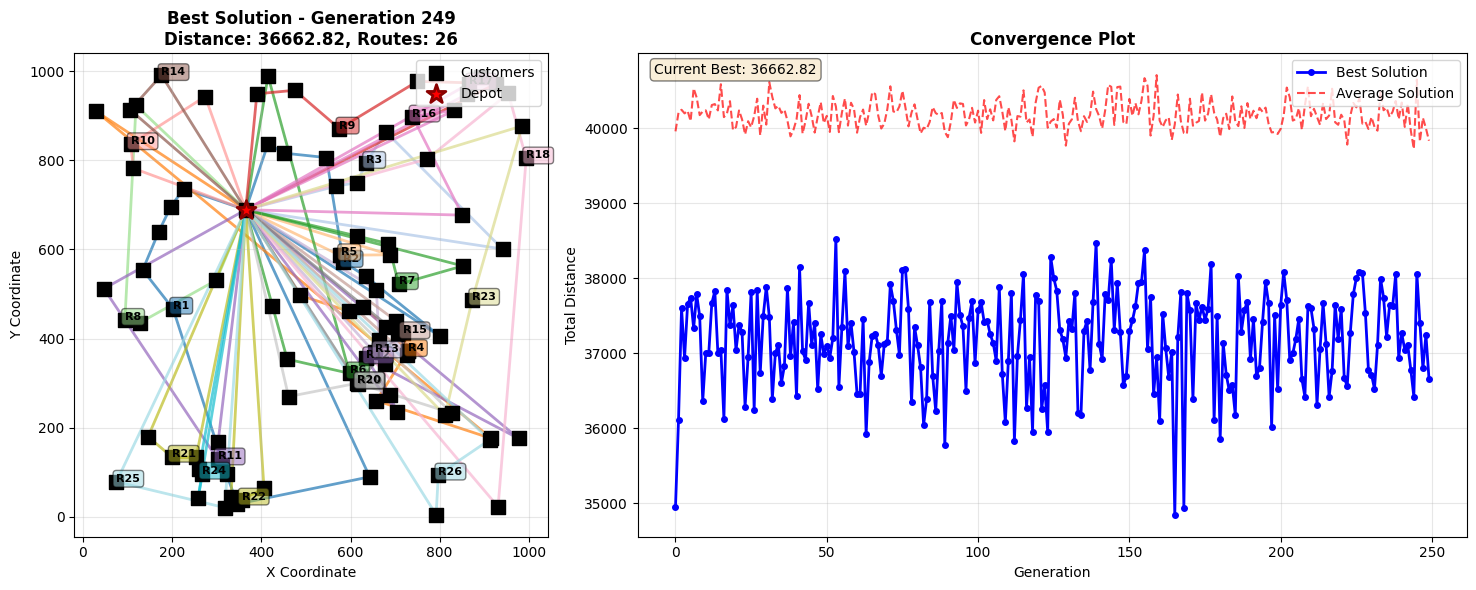

Total distance: 36662.82
Number of routes: 26
  Route 1: [1, 33, 25, 47, 36, 16, 77, 70, 8, 1] (demand: 206.0/206)
  Route 2: [1, 80, 51, 24, 35, 65, 88, 1] (demand: 206.0/206)
  Route 3: [1, 22, 101, 62, 98, 48, 1] (demand: 206.0/206)
  Route 4: [1, 59, 45, 41, 89, 58, 73, 66, 30, 74, 1] (demand: 200.0/206)
  Route 5: [1, 81, 18, 95, 1] (demand: 205.0/206)
  Route 6: [1, 13, 19, 40, 86, 1] (demand: 206.0/206)
  Route 7: [1, 9, 57, 97, 27, 1] (demand: 206.0/206)
  Route 8: [1, 6, 23, 42, 34, 1] (demand: 202.0/206)
  Route 9: [1, 31, 12, 20, 82, 63, 1] (demand: 200.0/206)
  Route 10: [1, 32, 96, 76, 1] (demand: 195.0/206)
  Route 11: [1, 21, 91, 85, 67, 1] (demand: 203.0/206)
  Route 12: [1, 79, 43, 64, 44, 1] (demand: 195.0/206)
  Route 13: [1, 4, 78, 15, 29, 1] (demand: 196.0/206)
  Route 14: [1, 54, 94, 1] (demand: 197.0/206)
  Route 15: [1, 60, 61, 83, 1] (demand: 205.0/206)
  Route 16: [1, 39, 92, 53, 1] (demand: 194.0/206)
  Route 17: [1, 84, 52, 72, 1] (demand: 194.0/206)
  Route

In [79]:
process_vrp_with_visualization(vrp_instances[0])

Generation 249/249: Best quality = 29014.35, Number of routes = 14, Avg quality = 29667.97


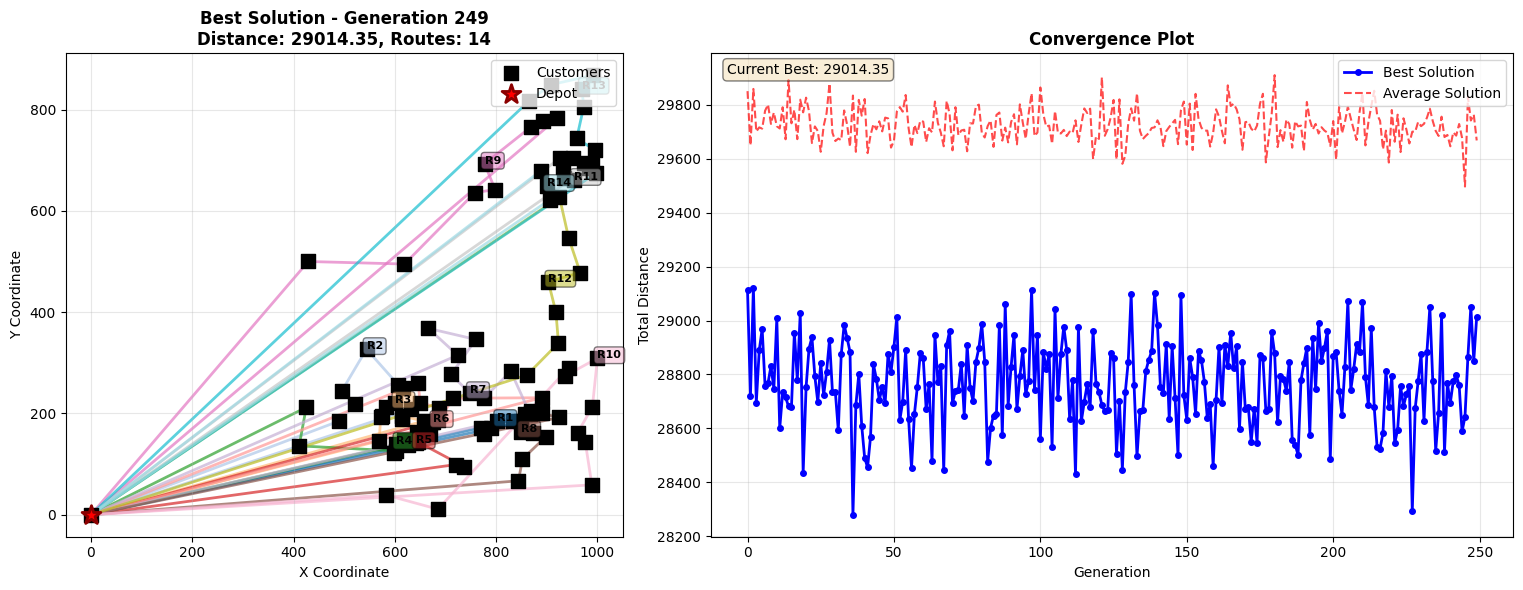

Total distance: 29014.35
Number of routes: 14
  Route 1: [1, 55, 86, 22, 100, 12, 35, 75, 1] (demand: 589.0/600)
  Route 2: [1, 53, 27, 63, 79, 8, 76, 13, 1] (demand: 594.0/600)
  Route 3: [1, 6, 93, 103, 91, 25, 2, 105, 102, 1] (demand: 585.0/600)
  Route 4: [1, 34, 23, 101, 46, 45, 16, 52, 77, 1] (demand: 599.0/600)
  Route 5: [1, 30, 73, 88, 61, 54, 104, 29, 1] (demand: 564.0/600)
  Route 6: [1, 85, 10, 67, 98, 94, 44, 47, 49, 1] (demand: 600.0/600)
  Route 7: [1, 38, 20, 28, 80, 72, 50, 15, 78, 1] (demand: 592.0/600)
  Route 8: [1, 18, 3, 84, 68, 14, 41, 32, 64, 58, 1] (demand: 598.0/600)
  Route 9: [1, 26, 57, 69, 96, 48, 62, 81, 66, 1] (demand: 579.0/600)
  Route 10: [1, 97, 83, 37, 9, 92, 70, 106, 65, 95, 1] (demand: 598.0/600)
  Route 11: [1, 39, 31, 90, 74, 33, 43, 4, 24, 1] (demand: 580.0/600)
  Route 12: [1, 59, 89, 87, 19, 42, 11, 17, 1] (demand: 573.0/600)
  Route 13: [1, 56, 99, 5, 71, 7, 82, 51, 40, 1] (demand: 598.0/600)
  Route 14: [1, 21, 36, 60, 1] (demand: 215.0/600

In [80]:
process_vrp_with_visualization(vrp_instances[1])

Generation 249/249: Best quality = 17720.44, Number of routes = 13, Avg quality = 19505.63


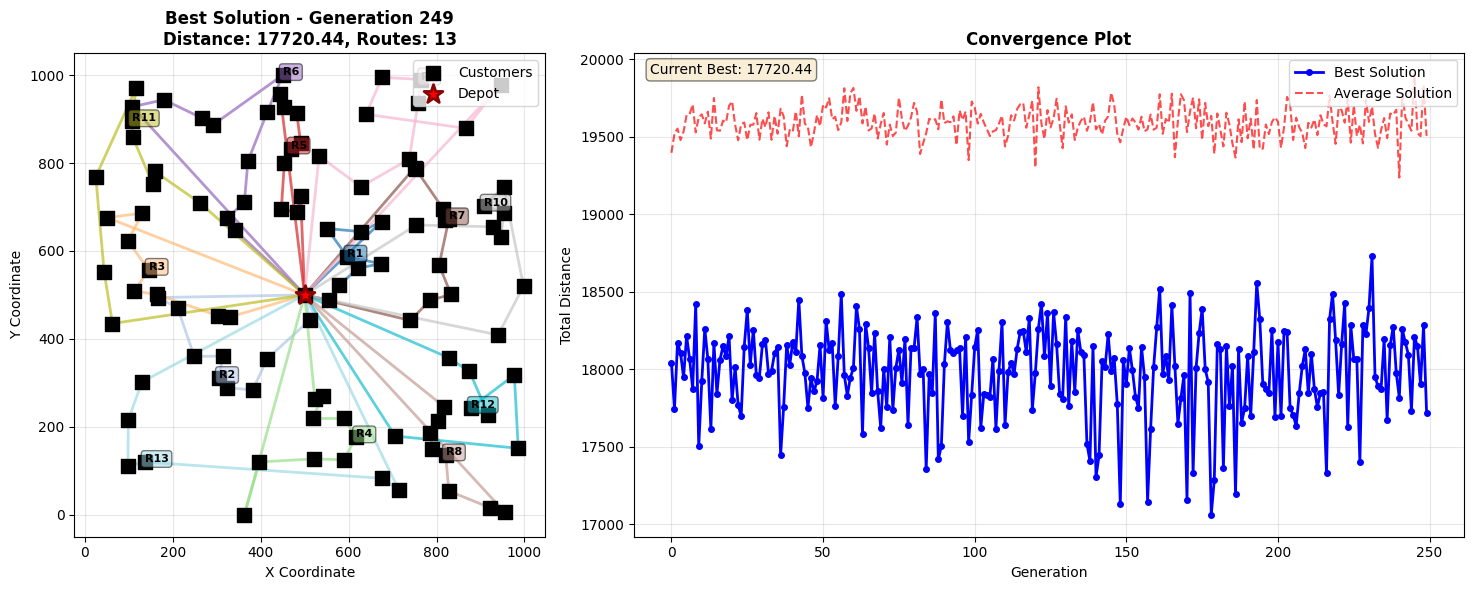

Total distance: 17720.44
Number of routes: 13
  Route 1: [1, 15, 4, 109, 39, 92, 7, 6, 47, 1] (demand: 65.0/66)
  Route 2: [1, 50, 20, 59, 13, 42, 69, 55, 40, 29, 1] (demand: 63.0/66)
  Route 3: [1, 53, 51, 32, 18, 28, 66, 100, 37, 1] (demand: 63.0/66)
  Route 4: [1, 63, 9, 101, 41, 48, 87, 11, 64, 73, 1] (demand: 65.0/66)
  Route 5: [1, 19, 110, 70, 26, 104, 25, 5, 102, 34, 1] (demand: 66.0/66)
  Route 6: [1, 72, 81, 31, 57, 103, 10, 56, 77, 84, 62, 1] (demand: 66.0/66)
  Route 7: [1, 2, 80, 33, 106, 35, 46, 68, 52, 86, 1] (demand: 63.0/66)
  Route 8: [1, 24, 14, 58, 83, 108, 8, 38, 95, 1] (demand: 65.0/66)
  Route 9: [1, 85, 78, 12, 16, 54, 27, 88, 99, 67, 1] (demand: 62.0/66)
  Route 10: [1, 90, 93, 21, 98, 107, 43, 75, 79, 1] (demand: 63.0/66)
  Route 11: [1, 3, 94, 44, 105, 61, 23, 65, 60, 96, 1] (demand: 64.0/66)
  Route 12: [1, 91, 17, 45, 71, 30, 82, 49, 1] (demand: 63.0/66)
  Route 13: [1, 97, 89, 76, 22, 74, 36, 1] (demand: 48.0/66)

COMPARISON SUMMARY
Nearest Neighbor:      

In [81]:
process_vrp_with_visualization(vrp_instances[2])

Generation 249/249: Best quality = 17465.64, Number of routes = 10, Avg quality = 19662.86


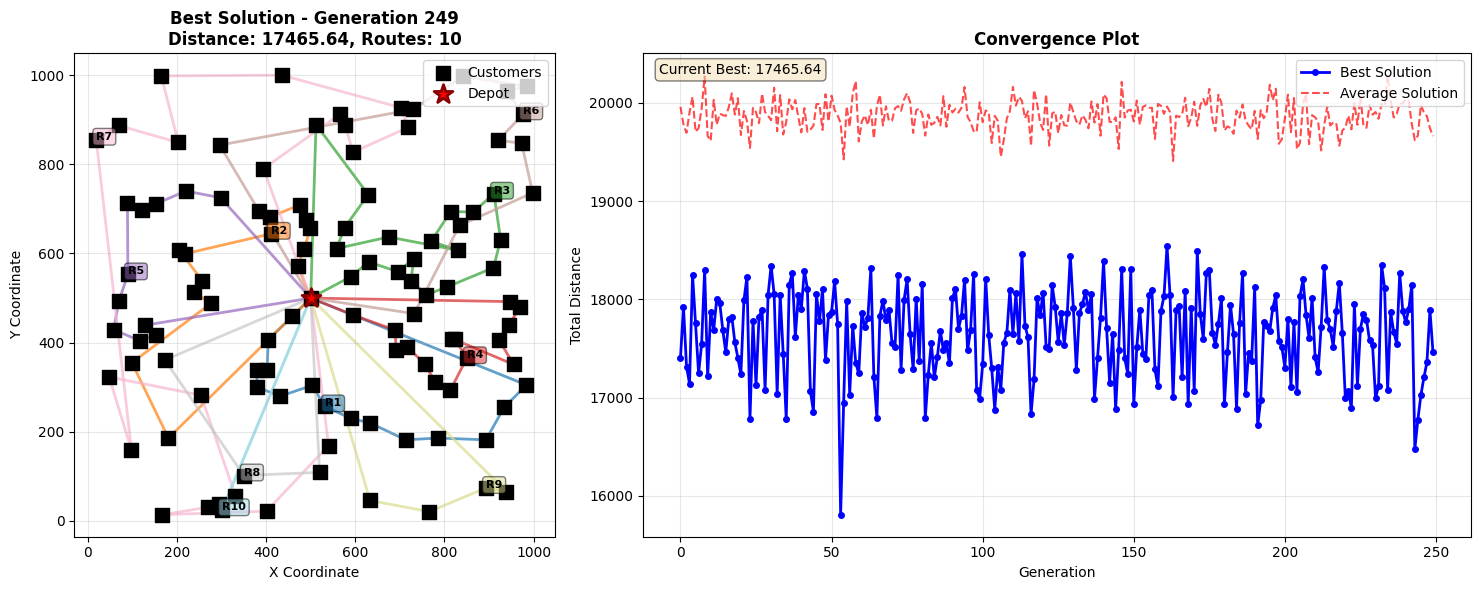

Total distance: 17465.64
Number of routes: 10
  Route 1: [1, 16, 33, 90, 18, 67, 17, 105, 42, 92, 3, 24, 66, 114, 59, 78, 1] (demand: 169.0/169)
  Route 2: [1, 51, 53, 22, 83, 89, 54, 79, 30, 96, 108, 60, 43, 11, 48, 74, 1] (demand: 169.0/169)
  Route 3: [1, 47, 65, 27, 35, 73, 103, 25, 72, 38, 91, 2, 75, 64, 99, 86, 112, 111, 113, 31, 1] (demand: 169.0/169)
  Route 4: [1, 14, 71, 37, 57, 32, 12, 82, 34, 62, 104, 39, 98, 81, 56, 77, 1] (demand: 169.0/169)
  Route 5: [1, 29, 101, 58, 93, 5, 36, 100, 50, 110, 94, 19, 1] (demand: 169.0/169)
  Route 6: [1, 70, 8, 40, 68, 41, 44, 15, 69, 9, 84, 55, 1] (demand: 169.0/169)
  Route 7: [1, 10, 45, 28, 106, 85, 76, 115, 95, 63, 21, 102, 88, 80, 107, 109, 49, 61, 87, 20, 26, 1] (demand: 169.0/169)
  Route 8: [1, 4, 6, 52, 1] (demand: 167.0/169)
  Route 9: [1, 23, 97, 46, 13, 1] (demand: 98.0/169)
  Route 10: [1, 7, 1] (demand: 87.0/169)

COMPARISON SUMMARY
Nearest Neighbor:      Distance = 18261.82, Routes = 11
Ant Colony Optimization: Distance =

In [82]:
process_vrp_with_visualization(vrp_instances[3])

Generation 249/249: Best quality = 15662.15, Number of routes = 6, Avg quality = 17436.34


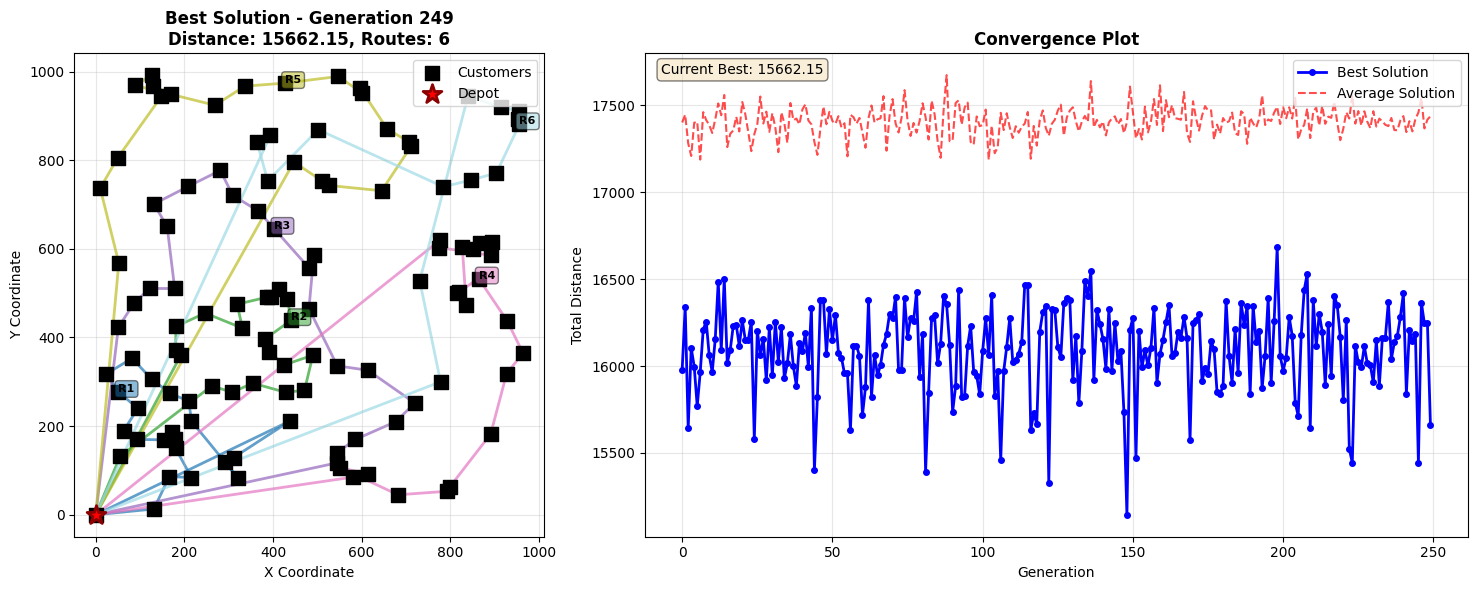

Total distance: 15662.15
Number of routes: 6
  Route 1: [1, 21, 117, 108, 62, 120, 95, 11, 89, 53, 39, 32, 74, 26, 30, 81, 17, 85, 55, 97, 72, 113, 1] (demand: 21.0/21)
  Route 2: [1, 51, 94, 56, 71, 46, 4, 9, 79, 40, 43, 110, 65, 114, 77, 44, 3, 50, 13, 22, 92, 33, 1] (demand: 21.0/21)
  Route 3: [1, 68, 31, 119, 80, 24, 15, 59, 84, 16, 10, 100, 99, 14, 83, 115, 91, 93, 7, 41, 63, 88, 1] (demand: 21.0/21)
  Route 4: [1, 103, 112, 73, 35, 28, 12, 57, 2, 25, 38, 60, 78, 101, 58, 69, 61, 96, 5, 23, 82, 70, 1] (demand: 21.0/21)
  Route 5: [1, 34, 37, 116, 75, 111, 66, 87, 49, 107, 8, 98, 47, 109, 67, 118, 27, 6, 42, 104, 18, 19, 1] (demand: 21.0/21)
  Route 6: [1, 20, 29, 45, 76, 86, 90, 52, 64, 105, 106, 102, 48, 54, 36, 1] (demand: 14.0/21)

COMPARISON SUMMARY
Nearest Neighbor:      Distance = 15848.90, Routes = 6
Ant Colony Optimization: Distance = 15662.15, Routes = 6

ACO improvement over Nearest Neighbor: 1.18%


In [83]:
process_vrp_with_visualization(vrp_instances[4])

In [84]:
# Summary
print("\n" + "="*80)
print("SUMMARY OF ALL INSTANCES")
print("="*80)
print(f"{'Instance':<35} {'NN Distance':<15} {'ACO Distance':<15} {'Improvement':<12}")
print(f"{'-'*80}")

for result in results:
    instance_name = result['instance'].split('/')[-1]  # Just get filename
    nn_dist = result.get('nn_quality', result.get('best_quality', 'N/A'))
    aco_dist = result.get('aco_quality', result.get('best_quality', 'N/A'))
    improvement = result.get('improvement', 0)
    
    # Handle both old format (if any) and new format
    if isinstance(nn_dist, (int, float)) and isinstance(aco_dist, (int, float)):
        print(f"{instance_name:<35} {nn_dist:>12.2f}     {aco_dist:>12.2f}     {improvement:>10.2f}%")
    else:
        # Fallback for old format (ACO only)
        nn_dist = result.get('best_quality', 'N/A')
        print(f"{instance_name:<35} {'N/A':<15} {nn_dist:>12.2f}     {'N/A':>12}")

print(f"{'-'*80}")

# Overall statistics
if results and all('nn_quality' in r and 'aco_quality' in r for r in results):
    avg_nn = sum(r['nn_quality'] for r in results) / len(results)
    avg_aco = sum(r['aco_quality'] for r in results) / len(results)
    avg_improvement = sum(r.get('improvement', 0) for r in results) / len(results)
    
    print(f"\nAverage Nearest Neighbor Distance: {avg_nn:.2f}")
    print(f"Average ACO Distance: {avg_aco:.2f}")
    print(f"Average Improvement: {avg_improvement:.2f}%")


SUMMARY OF ALL INSTANCES
Instance                            NN Distance     ACO Distance    Improvement 
--------------------------------------------------------------------------------
X-n101-k25.vrp                          41520.05         36662.82          11.70%
X-n106-k14.vrp                          28901.49         29014.35          -0.39%
X-n110-k13.vrp                          19298.42         17720.44           8.18%
X-n115-k10.vrp                          18261.82         17465.64           4.36%
X-n120-k6.vrp                           15848.90         15662.15           1.18%
--------------------------------------------------------------------------------

Average Nearest Neighbor Distance: 24766.14
Average ACO Distance: 23305.08
Average Improvement: 5.00%


In general, Ant Colony Optimization can be modified according to the problem's characteristics (remember what we discussed in the lecture).

A crucial step is to define a proper **solution representation**! How does that affect the problem you have picked?

Reflect on the modifications you need to perform to develop a proper ACO for your case study.

<br><br>

<table style="width:100%">
  <tr>
    <td rowspan="3" style="width:210px"><a href="https://ju.se/en"><img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/JU_A_sv.jpg" width="200" align="left"></a></td>
    <td><span style="font-family:Times New Roman; color:#002080; font-size:18px; text-align:right;">State-of-the-Art in AI Research</span></td>
    </tr>
    <tr>
      <td><span style="font-family:Times New Roman; font-size:16px; text-align:right;">Seminar 3: Ant Colony Optimization: hands-on experience</span></td>
    </tr>
    <tr>
      <td><span style="font-family:Times New Roman; font-size:16px; text-align:right;">HT2025</span></td>
    </tr>
</table>